# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

### Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

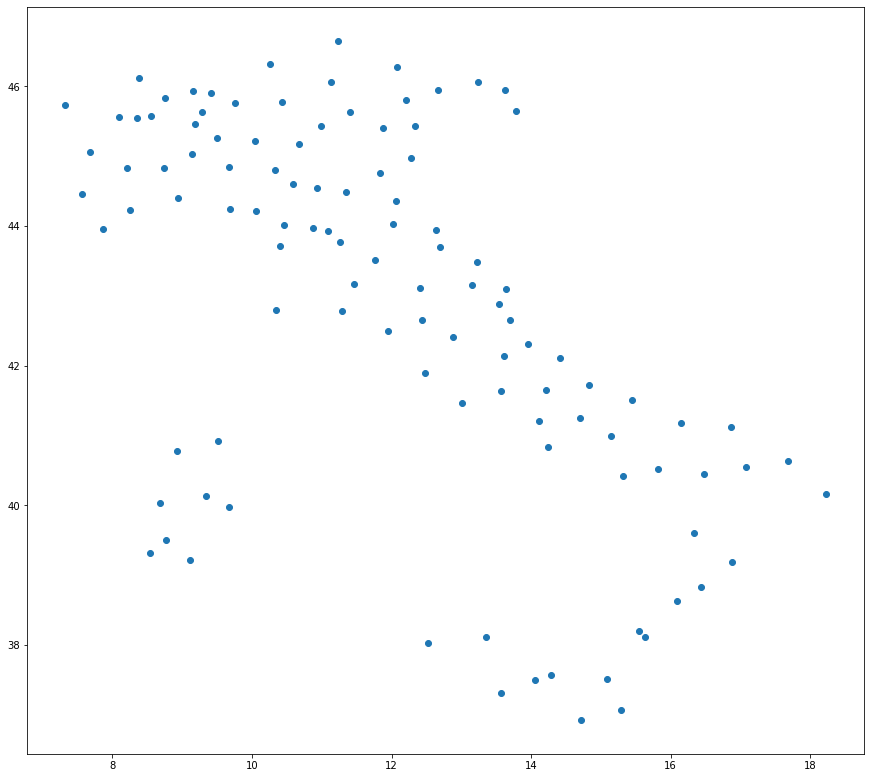

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

map_italy = pd.read_csv('cap_prov_ita.dat', delimiter=' ', header=None, names=['x', 'y'])

#print(map_italy)

fig, axs = plt.subplots(1, 1, figsize=(15,15))
axs.scatter(map_italy['x'], map_italy['y'])
axs.set_aspect('equal')
plt.show()

[  0  65  97  96  61  18  21  86  63  87  62  48  40  89   4  34  76  73
  72  50  53  43  71  49  67  38   1   6  88  41  30  95   3  13 105  60
 104 102  26  56  58  47  12  28  16  91  15  98 108 106  52  66  80  57
  14  64  99  10  74 101  39 100 103  84  33  78  36  82  69  68  94 109
  83  45  37  44  81  51   2  32   5  93  70  25  42  22  59  11  20  35
   7  85  75   9   8  17  46  92  54  27  29  24 107  55  79  23  90  77
  31  19]


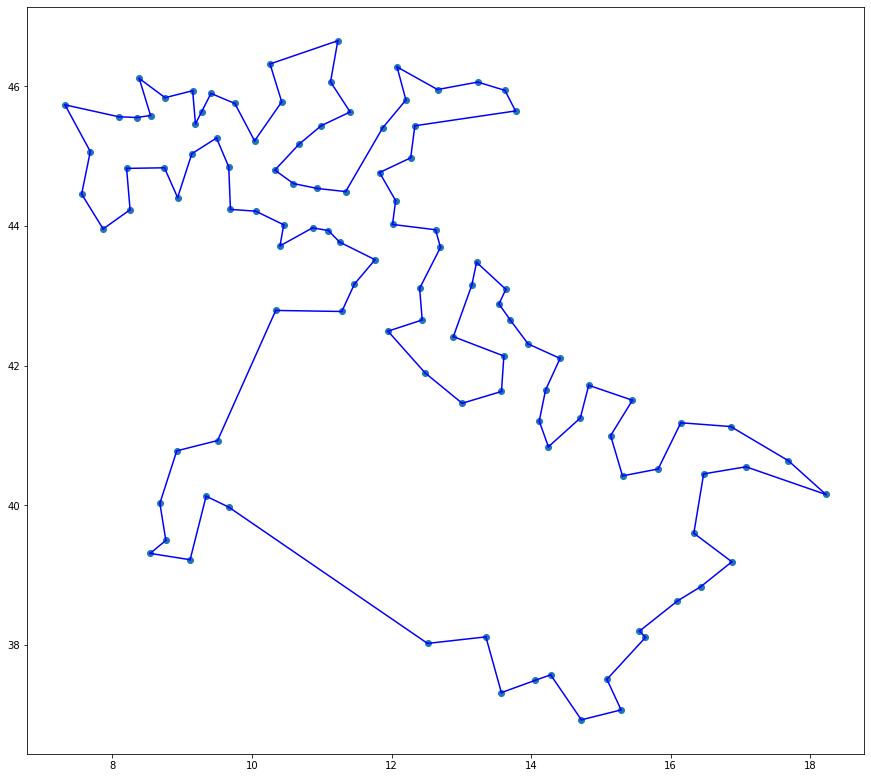

In [2]:
test_italy = pd.read_csv('test.dat', delimiter='\t', header=None)
test = test_italy.loc[0, :].values-1

print(test)

x = map_italy['x'].values
y = map_italy['y'].values

fig, axs = plt.subplots(1, 1, figsize=(15,15))
axs.scatter(map_italy['x'], map_italy['y'])
axs.set_aspect('equal')

for i, point in enumerate(test):
    axs.plot([x[point], x[test[i-1]]], [y[point], y[test[i-1]]], color='blue')

plt.show()